In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas import DataFrame

### delete warning
warnings.filterwarnings('ignore')
#read data
train_data = pd.read_csv("google_review_ratings.csv")

In [2]:
train_x = train_data[["User","Category 1","Category 2","Category 3","Category 4",
                     "Category 5","Category 6","Category 7","Category 8","Category 9",
                     "Category 10","Category 11","Category 12","Category 13","Category 14",
                     "Category 15","Category 16","Category 17","Category 18","Category 19",
                     "Category 20","Category 21","Category 22","Category 23","Category 24"]]
train_x = train_x.drop(["User"],axis=1)
train_x = train_x.replace(np.NAN,0)
train_x.dtype = "float32"
train_x = np.array(train_x).T

strs = "Category "
#each category kind
kinds = ["Church","Resort","Beach","Park","Theatre","Museum",
         "Mall","Zoo","Restaurant","Pub/Bar","Local Service","Buger/Pizza Shops",
         "Hotel/Other Lodging","Juice Bar","Art Gallery","Dance Club","Swimming Pool",
         "Gym","Bakery","Beauty & Spa","Cafe","View Points","Monument","Garden"]

In [3]:
#each category average rank
average_rank = []
#handle data error 
train_x[10][2712] = 2.2

for i in train_x:
    m = np.mean(i[i!=0] ,dtype="float32")
    average_rank.append(m)

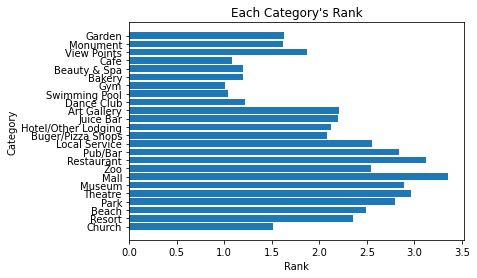

In [4]:
#plot category rank
plt.barh(kinds,average_rank,left=0)
plt.xlabel("Rank")
plt.ylabel("Category")
plt.title("Each Category's Rank")
plt.show()

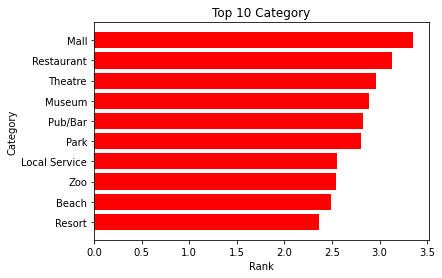

In [5]:
#print top 10 category
rank_category = np.array(list(sorted(zip(average_rank,kinds),reverse = True)))
x = []
y = []
for i in range(0,10):
    x.append(rank_category[i][0])
    y.append(rank_category[i][1])
x = np.array(x,dtype="float32")
x = np.around(x,decimals = 2)
x = x[::-1]
y = np.array(y)
y = y[::-1]
plt.barh(y,x,color="red")
plt.xlabel("Rank")
plt.ylabel("Category")
plt.title("Top 10 Category")
plt.show()

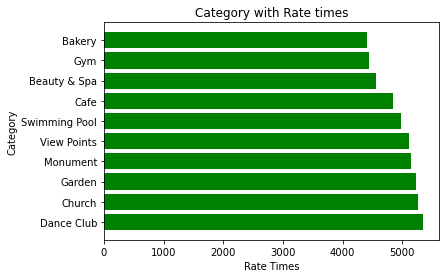

In [6]:
#最少人評分之category
times = []
for x in train_x:
    x = x.astype("float32")
    t = len(x[x>0])
    times.append(t)
times_category = np.array(list(sorted(zip(times,kinds),reverse = False)))
x = []
y = []
for i in range(0,10):
    x.append(times_category[i][0])
    y.append(times_category[i][1])
x = np.array(x,dtype="float32")
x = np.around(x,decimals = 2)
x = x[::-1]
y = np.array(y)
y = y[::-1]
plt.barh(y,x,color="green")
plt.xlabel("Rate Times")
plt.ylabel("Category")
plt.title("Category with Rate times")
plt.show()

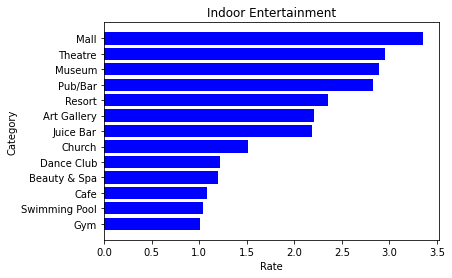

In [7]:
#indooor entertainment rank

indoors = []
indoors.append(kinds.index("Church"))
indoors.append(kinds.index("Resort"))
indoors.append(kinds.index("Theatre"))
indoors.append(kinds.index("Museum"))
indoors.append(kinds.index("Mall"))
indoors.append(kinds.index("Pub/Bar"))
indoors.append(kinds.index("Juice Bar"))
indoors.append(kinds.index("Art Gallery"))
indoors.append(kinds.index("Dance Club"))
indoors.append(kinds.index("Swimming Pool"))
indoors.append(kinds.index("Gym"))
indoors.append(kinds.index("Museum"))
indoors.append(kinds.index("Beauty & Spa"))
indoors.append(kinds.index("Cafe"))

x = []
y = []
for i in range(len(indoors)):
    x.append(average_rank[indoors[i]])
    y.append(kinds[indoors[i]])

x,y = zip(*sorted(zip(x,y),reverse=False))
plt.barh(y,x,color="blue")
plt.xlabel("Rate")
plt.ylabel("Category")
plt.title("Indoor Entertainment")
plt.show()

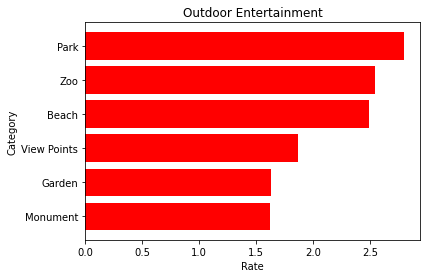

In [8]:
#outdooor entertainment rank

outdoors = []
outdoors.append(kinds.index("Beach"))
outdoors.append(kinds.index("Park"))
outdoors.append(kinds.index("Zoo"))
outdoors.append(kinds.index("View Points"))
outdoors.append(kinds.index("Monument"))
outdoors.append(kinds.index("Garden"))

x = []
y = []
for i in range(len(outdoors)):
    x.append(average_rank[outdoors[i]])
    y.append(kinds[outdoors[i]])

x,y = zip(*sorted(zip(x,y),reverse=False))
plt.barh(y,x,color="red")
plt.xlabel("Rate")
plt.ylabel("Category")
plt.title("Outdoor Entertainment")
plt.show()

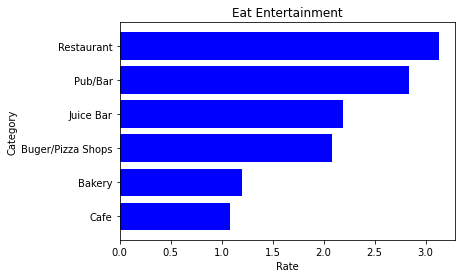

In [9]:
#eat category
eats = []
eats.append(kinds.index("Restaurant"))
eats.append(kinds.index("Pub/Bar"))
eats.append(kinds.index("Buger/Pizza Shops"))
eats.append(kinds.index("Juice Bar"))
eats.append(kinds.index("Bakery"))
eats.append(kinds.index("Cafe"))

x = []
y = []
for i in range(len(eats)):
    x.append(average_rank[eats[i]])
    y.append(kinds[eats[i]])

x,y = zip(*sorted(zip(x,y),reverse=False))
plt.barh(y,x,color="blue")
plt.xlabel("Rate")
plt.ylabel("Category")
plt.title("Eat Entertainment")
plt.show()

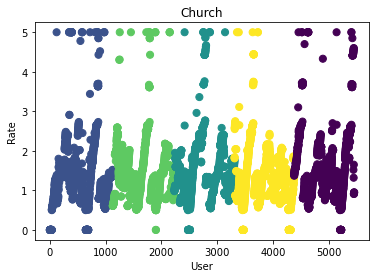

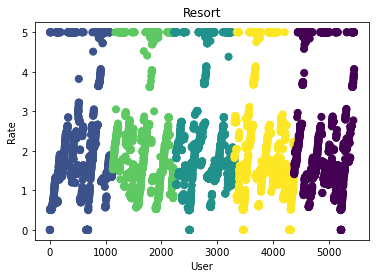

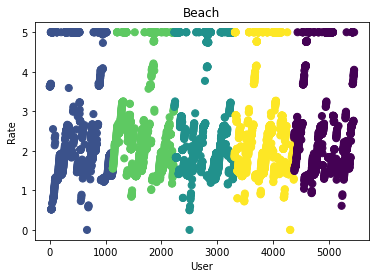

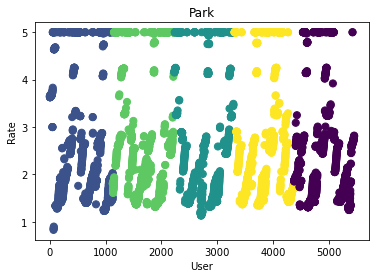

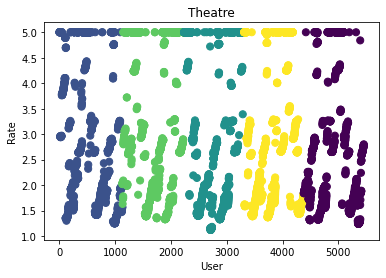

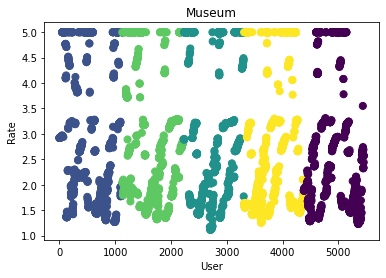

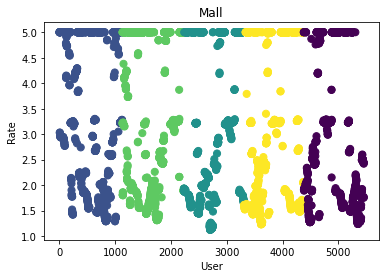

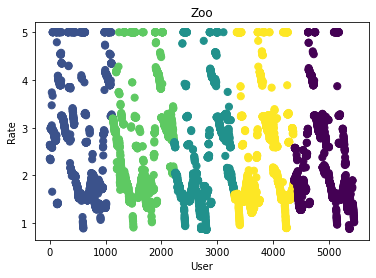

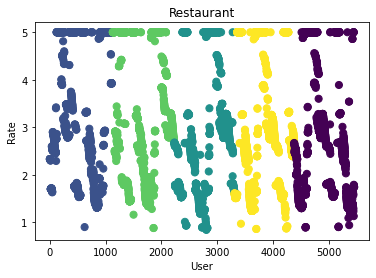

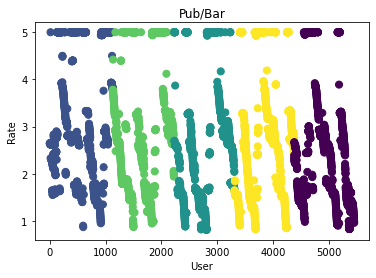

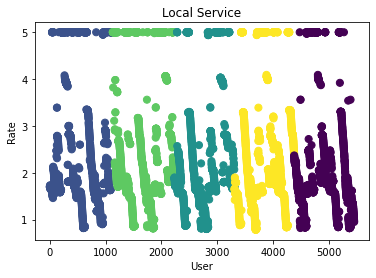

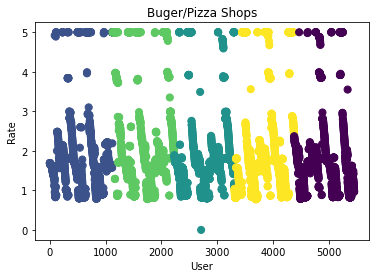

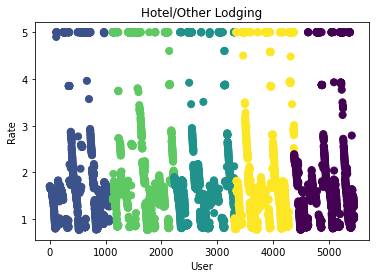

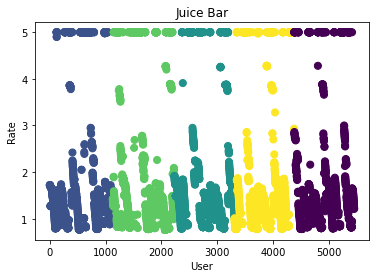

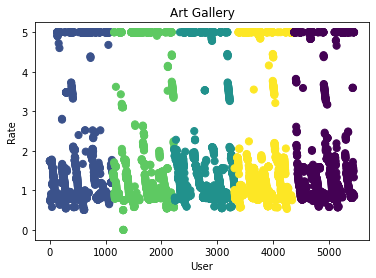

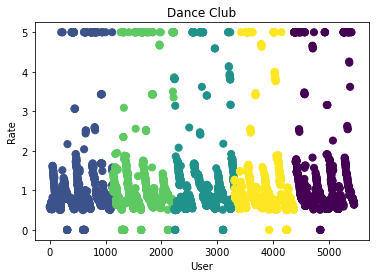

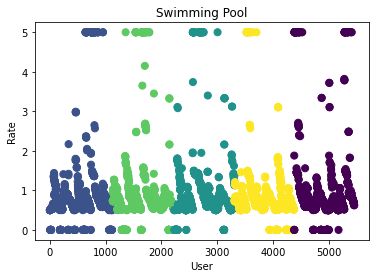

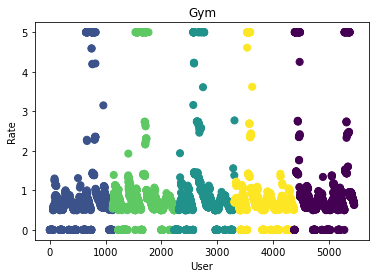

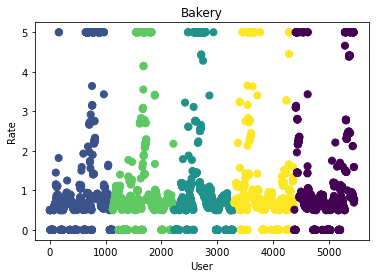

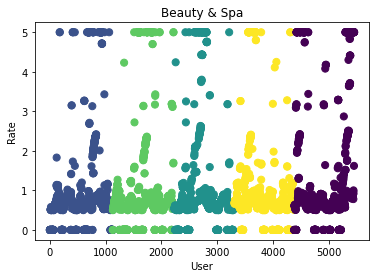

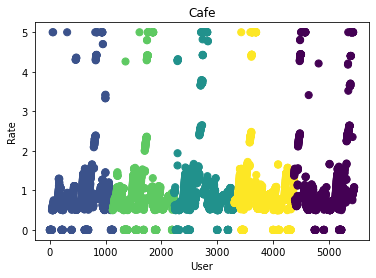

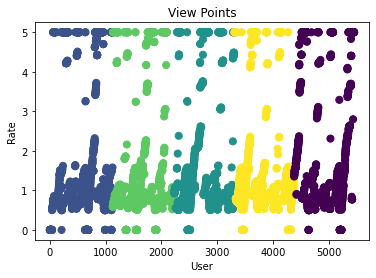

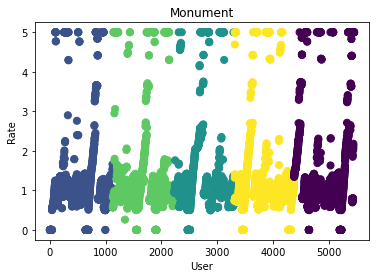

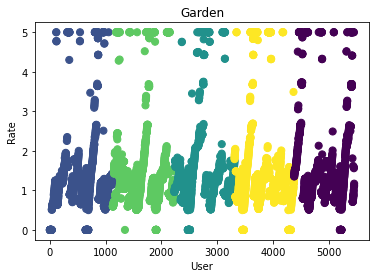

In [10]:
#original
X = np.arange(0,len(train_x[0])).reshape(-1,1)

clf = KMeans(n_clusters=5)

clf.fit(X)

clf.labels_
for i in range(len(train_x)):
    train_x[i] = train_x[i].astype("float32")
    plt.scatter(np.arange(0,len(train_x[0])),train_x[i,:], c=clf.labels_,s=50)
    plt.xlabel("User")
    plt.ylabel("Rate")
    plt.title(kinds[i])
    plt.show()


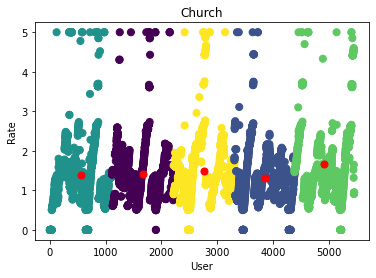

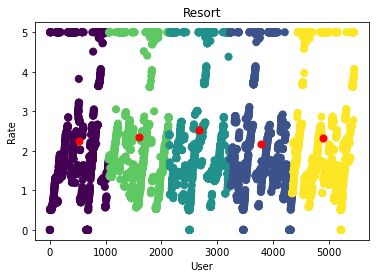

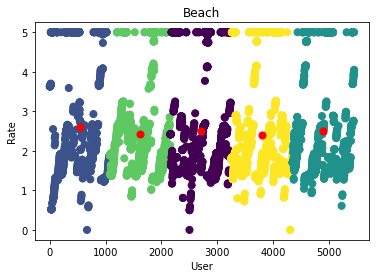

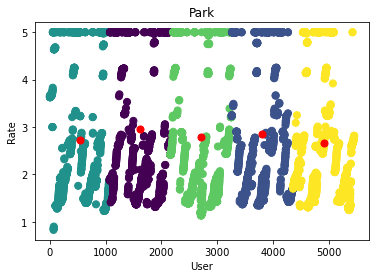

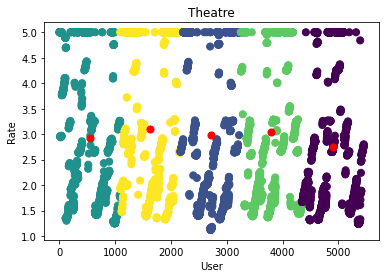

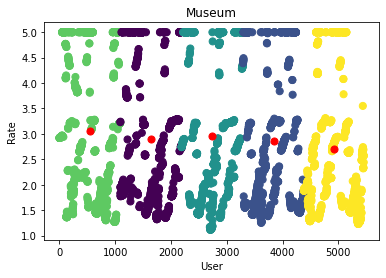

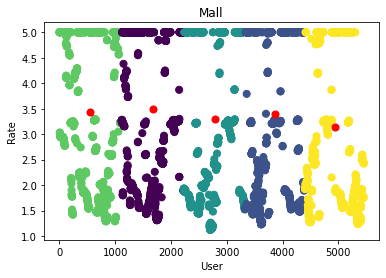

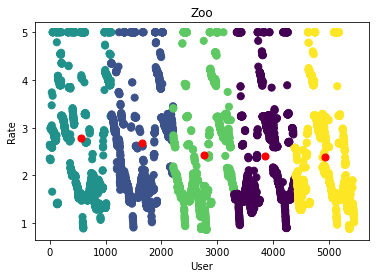

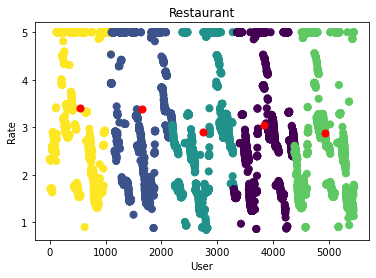

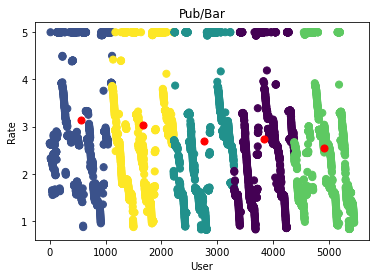

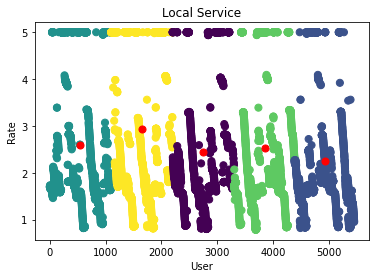

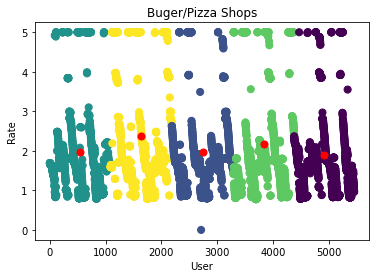

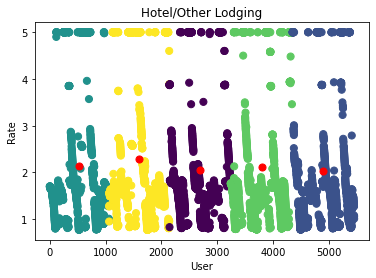

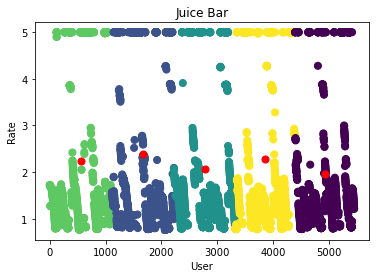

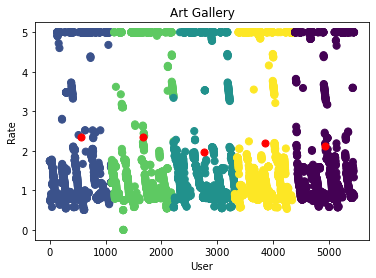

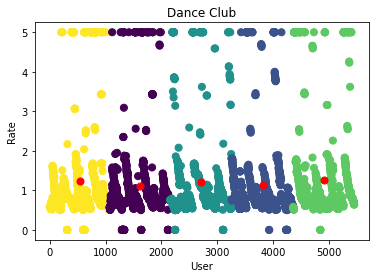

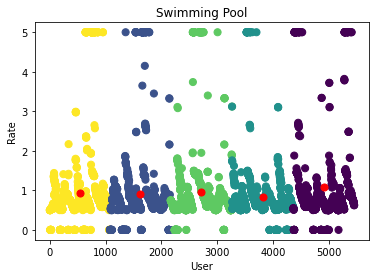

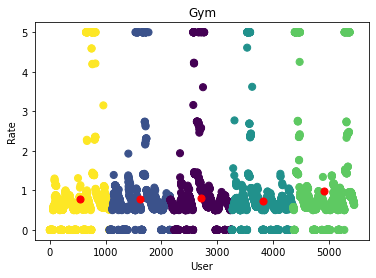

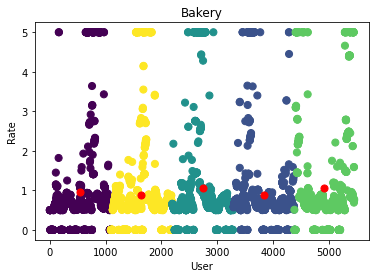

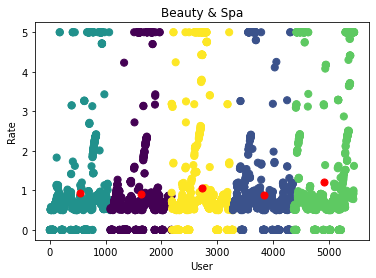

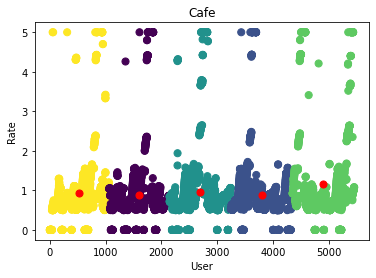

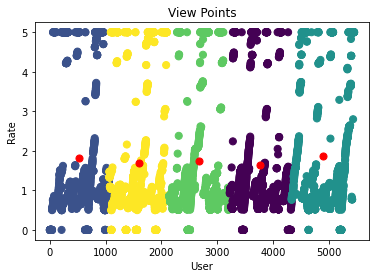

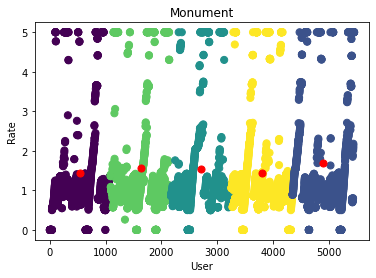

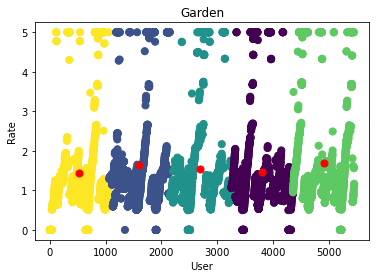

In [11]:
#improvement
for i in range(len(train_x)):
    Data = {'x': np.arange(0,len(train_x[0])),
            'y': train_x[i]
           }
    df = DataFrame(Data,columns=['x','y'])
    kmeans = KMeans(n_clusters=5).fit(df)
    centroids = kmeans.cluster_centers_

    plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.xlabel("User")
    plt.ylabel("Rate")
    plt.title(kinds[i])
    plt.show()